In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
from scipy.stats.mstats import gmean
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

In [2]:
data = pd.read_pickle('LuxSE.pkl')
mean = data.groupby(['AHL','IPTG'])['FITC-A'].apply(gmean).reset_index()
piv = mean.pivot_table(index='IPTG', columns='AHL', values='FITC-A')
R =[]
for i in mean.IPTG.unique():
    tmp = mean[mean.IPTG ==i]['FITC-A'].max()/mean[mean.IPTG ==i]['FITC-A'].min()
    R.append([i,tmp])
R = pd.DataFrame(R,columns=['IPTG','Induction Ratio'])

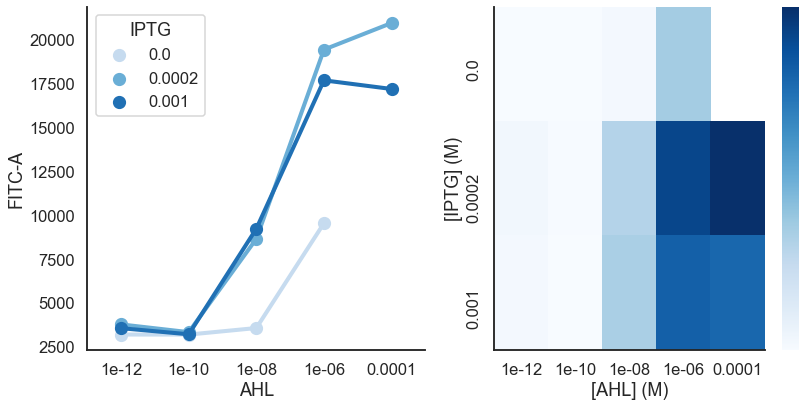

In [38]:
sns.set_context('talk')
sns.set_style('white')
f, axes = plt.subplots(ncols=2,figsize=(12,6))
sns.pointplot(x='AHL',y='FITC-A',hue='IPTG',estimator=gmean,data=data,palette='Blues',ax=axes[0])
g = sns.heatmap(piv, cmap='Blues',ax=axes[1])
cbar = g.collections[0].colorbar
cbar.set_ticks([0, 25, 50, 75,100])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
axes[1].set_xlabel(r'[AHL] (M)')
axes[1].set_ylabel(r'[IPTG] (M)')
#f.tight_layout()
#sns.barplot(x='IPTG',y='Induction Ratio',data=R,palette='Blues',ax=axes[2])
sns.despine()
#axes[1].xaxis.set_major_formatter(ticker.LogFormatter())
#axes[1].yaxis.set_major_formatter(ticker.ScalarFormatter())
#axes[1].ticklabel_format(axis='both',style='scientific')
f.tight_layout()
f.savefig('LUXSE.png',dpi=300)

IPTG=0.0


C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


IPTG=0.0002


C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


IPTG=0.001


C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\Jonathan\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


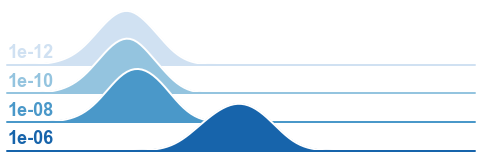

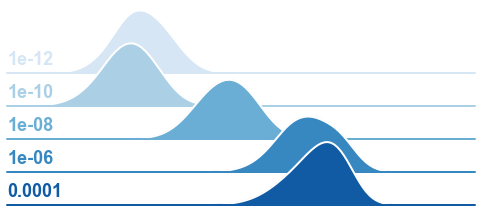

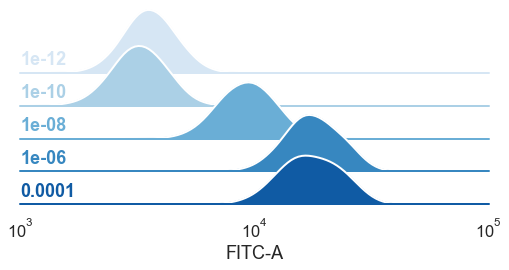

In [45]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')
for I in data.IPTG.unique():
    tmpdf = data[data.IPTG==I][['AHL','FITC-A']]
    print('IPTG=' +str(I))
    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(tmpdf, row="AHL", hue="AHL", aspect=10, height=.75, palette='Blues')#
    #g.set(xlim=(0, 20000))
    # Draw the densities in a few steps
    g.map(sns.kdeplot, "FITC-A", clip_on=True, shade=True, alpha=1, lw=1,log_scale=True,bw_adjust=3)
    g.map(sns.kdeplot, "FITC-A", clip_on=True, color="w", lw=2,log_scale=True,bw_adjust=3)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)
        #ax.set_xlim(1e2,2e5)
    g.set(xlim=(1e3,1e5))

    if I ==0.001:
        g.map(label, "FITC-A")
    else:
        g.map(label, "FITC-A")
        for ax in g.axes.flat:
            ax.set_axis_off()
        g.set(xticks=[])

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.5)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    #plt.show()
    g.savefig('Ridge_Lux_IPTG {:.1e}.pdf'.format(I))


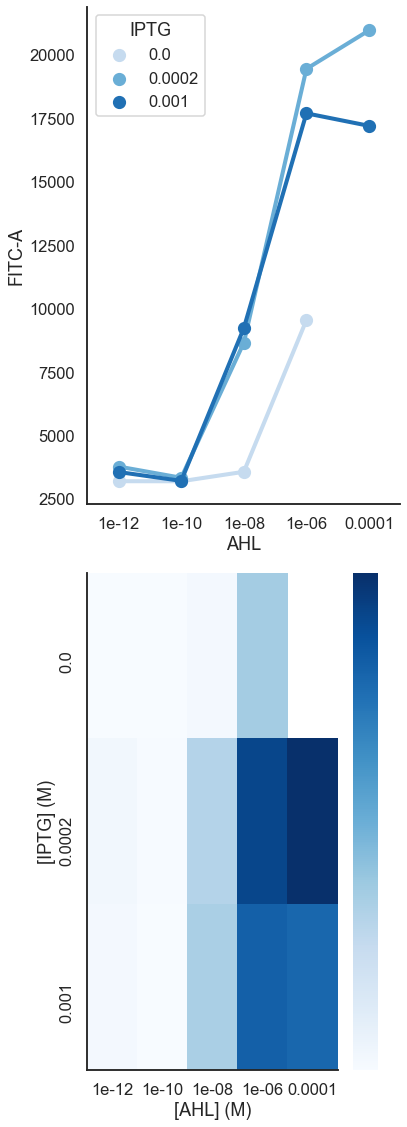

In [37]:
sns.set_context('talk')
sns.set_style('white')
f, axes = plt.subplots(nrows=2,figsize=(6,16))
sns.pointplot(x='AHL',y='FITC-A',hue='IPTG',estimator=gmean,data=data,palette='Blues',ax=axes[0])
g = sns.heatmap(piv, cmap='Blues',ax=axes[1])
cbar = g.collections[0].colorbar
cbar.set_ticks([0, 25, 50, 75,100])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
axes[1].set_xlabel(r'[AHL] (M)')
axes[1].set_ylabel(r'[IPTG] (M)')
#f.tight_layout()
#sns.barplot(x='IPTG',y='Induction Ratio',data=R,palette='Blues',ax=axes[2])
sns.despine()
#axes[1].xaxis.set_major_formatter(ticker.LogFormatter())
#axes[1].yaxis.set_major_formatter(ticker.ScalarFormatter())
#axes[1].ticklabel_format(axis='both',style='scientific')
f.tight_layout()
f.savefig('LUXSE_Tall.png',dpi=300)

TypeError: __init__() got an unexpected keyword argument 'ax'

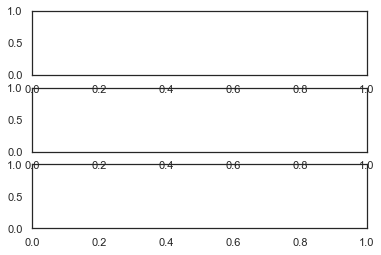

In [7]:
f, (ax1,ax2,ax3)=plt.subplots(nrows=3)
g = sns.FacetGrid(tmpdf, row="AHL", hue="AHL", aspect=5, height=1, palette='Blues')#
#g.set(xlim=(0, 20000))
# Draw the densities in a few steps
g.map(sns.kdeplot, "FITC-A", clip_on=False, shade=True, alpha=1, lw=1,log_scale=True,bw_adjust=3)
g.map(sns.kdeplot, "FITC-A", clip_on=False, color="w", lw=2,log_scale=True,bw_adjust=3)
g.map(plt.axhline, y=0, lw=2, clip_on=False)
g.map(label, "FITC-A")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.show()